# La poule qui chante 

## La préparation et le nettoyage des données 

### Importation des librairies 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importation des donéées 

In [2]:
population=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\Population_2000_2018.csv")
disponibilité_alimentaire=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\DisponibiliteAlimentaire_2017.csv")
climat=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\climat.csv")
politique=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\PoliticalStability.csv")
pib=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\pib.csv",delimiter = ';')
internet=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\internet.csv",delimiter = ';')
euro=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\Zone_euro.csv",delimiter = ';')

### Explorer la table population 

In [3]:
population.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [4]:
population.describe()

,Code zone,Code Élément,Code Produit,Code année,Année,Valeur
count,4411.000000,4411.0,4411.0,4411.000000,4411.000000,4.411000e+03
mean,132.202902,511.0,3010.0,2009.068238,2009.068238,2.963004e+04
std,75.854840,0.0,0.0,5.481539,5.481539,1.238029e+05
min,1.000000,511.0,3010.0,2000.000000,2000.000000,7.850000e-01
25%,68.000000,511.0,3010.0,2004.000000,2004.000000,3.921890e+02
50%,132.000000,511.0,3010.0,2009.000000,2009.000000,4.764741e+03
75%,195.000000,511.0,3010.0,2014.000000,2014.000000,1.821548e+04
max,299.000000,511.0,3010.0,2018.000000,2018.000000,1.427648e+06


In [5]:
population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [6]:
population["Code Domaine"].unique()


array(['OA'], dtype=object)

In [7]:
population["Domaine"].unique()

array(['Séries temporelles annuelles'], dtype=object)

In [8]:
population["Code Élément"].unique()

array([511], dtype=int64)

In [9]:
population["Code Produit"].unique()


array([3010], dtype=int64)

In [10]:
population["Produit"].unique()


array(['Population-Estimations'], dtype=object)

In [11]:
population["Unité"].unique()

array(['1000 personnes'], dtype=object)

In [12]:
population.rename(columns={"Valeur" : "population"},inplace=True)

On a plusieurs colonnes qui ne donnent aucune information supplémentaire, donc on garde que les colonne importantes <br>
Code zone , zone ,année ,valeur

In [13]:
population=population.drop(["Code zone","Code Domaine","Domaine","Code Élément","Élément","Code Produit","Produit","Unité","Symbole","Description du Symbole","Note","Code année"], axis=1)
population

,Zone,Année,population
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Zimbabwe,2014,13586.707
4407,Zimbabwe,2015,13814.629
4408,Zimbabwe,2016,14030.331
4409,Zimbabwe,2017,14236.595


In [14]:
population["population"]=population["population"]*1000

In [15]:
population=population[population["Année"]==2017]

population

,Zone,Année,population
17,Afghanistan,2017,36296113.0
36,Afrique du Sud,2017,57009756.0
55,Albanie,2017,2884169.0
74,Algérie,2017,41389189.0
93,Allemagne,2017,82658409.0
...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402484.0
4352,Viet Nam,2017,94600648.0
4371,Yémen,2017,27834819.0
4390,Zambie,2017,16853599.0


### Explorer la table disponibilité alimentaire

In [16]:
disponibilité_alimentaire


,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [17]:
da=disponibilité_alimentaire[["Code zone","Zone","Élément","Produit","Année","Unité","Valeur"]]

In [18]:
da

,Code zone,Zone,Élément,Produit,Année,Unité,Valeur
0,2,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.00
1,2,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.00
2,2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.00
3,2,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.00
4,2,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.00
...,...,...,...,...,...,...,...
176595,181,Zimbabwe,Nourriture,Miscellanees,2017,Milliers de tonnes,19.00
176596,181,Zimbabwe,Disponibilité alimentaire en quantité (kg/pers...,Miscellanees,2017,kg,1.33
176597,181,Zimbabwe,Disponibilité alimentaire (Kcal/personne/jour),Miscellanees,2017,Kcal/personne/jour,1.00
176598,181,Zimbabwe,Disponibilité de protéines en quantité (g/pers...,Miscellanees,2017,g/personne/jour,0.04


In [19]:
da=da.pivot(index=["Zone","Année","Produit"], columns='Élément', values='Valeur')


In [20]:
da=da.fillna(0)
da

Élément                                    Alimentation pour touristes  \
Zone         Année Produit                                               
Afghanistan  2017  Abats Comestible                                0.0   
                   Agrumes, Autres                                 0.0   
                   Alcool, non Comestible                          0.0   
                   Aliments pour enfants                           0.0   
                   Ananas et produits                              0.0   
...                                                                ...   
Îles Salomon 2017  Viande de Suides                               -0.0   
                   Viande de Volailles                            -0.0   
                   Viande, Autre                                  -0.0   
                   Vin                                            -0.0   
                   Épices, Autres                                 -0.0   

Élément                                    Aliments pour animaux  \
Zone         Année Produit                                         
Afghanistan  2017  Abats Comestible                          0.0   
                   Agrumes, Autres                           0.0   
                   Alcool, non Comestible                    0.0   
                   Aliments pour enfants                     0.0   
                   Ananas et produits                        0.0   
...                                                          ...   
Îles Salomon 2017  Viande de Suides                          0.0   
                   Viande de Volailles                       0.0   
                   Viande, Autre                             0.0   
                   Vin                                       0.0   
                   Épices, Autres                            0.0   

Élément                                    Autres utilisations (non alimentaire)  \
Zone         Année Produit                                                         
Afghanistan  2017  Abats Comestible                                          0.0   
                   Agrumes, Autres                                           0.0   
                   Alcool, non Comestible                                    0.0   
                   Aliments pour enfants                                     0.0   
                   Ananas et produits                                        0.0   
...                                                                          ...   
Îles Salomon 2017  Viande de Suides                                          0.0   
                   Viande de Volailles                                       0.0   
                   Viande, Autre                                             0.0   
                   Vin                                                       0.0   
                   Épices, Autres                                            0.0   

Élément                                    Disponibilité alimentaire (Kcal/personne/jour)  \
Zone         Année Produit                                                                  
Afghanistan  2017  Abats Comestible                                                   5.0   
                   Agrumes, Autres                                                    1.0   
                   Alcool, non Comestible                                             0.0   
                   Aliments pour enfants                                              1.0   
                   Ananas et produits                                                 0.0   
...                                                                                   ...   
Îles Salomon 2017  Viande de Suides                                                  44.0   
                   Viande de Volailles                                               18.0   
                   Viande, Autre                                                      0.0   
                   Vin              

In [21]:
da=da.reset_index()


In [22]:
da.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16047 entries, 0 to 16046
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           16047 non-null  object 
 1   Année                                                          16047 non-null  int64  
 2   Produit                                                        16047 non-null  object 
 3   Alimentation pour touristes                                    16047 non-null  float64
 4   Aliments pour animaux                                          16047 non-null  float64
 5   Autres utilisations (non alimentaire)                          16047 non-null  float64
 6   Disponibilité alimentaire (Kcal/personne/jour)                 16047 non-null  float64
 7   Disponibilité alimentaire en quantité (kg/personne/an)    

In [23]:
da=da[da["Produit"]=="Viande de Volailles"]
da.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 78 to 16043
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Année                                                          172 non-null    int64  
 2   Produit                                                        172 non-null    object 
 3   Alimentation pour touristes                                    172 non-null    float64
 4   Aliments pour animaux                                          172 non-null    float64
 5   Autres utilisations (non alimentaire)                          172 non-null    float64
 6   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 7   Disponibilité alimentaire en quantité (kg/personne/an)     

In [24]:
da

Élément,Zone,Année,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
78,Afghanistan,2017,Viande de Volailles,0.0,0.0,0.0,5.0,1.53,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0,0.0
173,Afrique du Sud,2017,Viande de Volailles,0.0,0.0,0.0,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0,-0.0
265,Albanie,2017,Viande de Volailles,0.0,0.0,0.0,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,0.0,0.0,4.0
357,Algérie,2017,Viande de Volailles,0.0,0.0,0.0,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0,0.0
452,Allemagne,2017,Viande de Volailles,0.0,0.0,0.0,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,0.0,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668,Émirats arabes unis,2017,Viande de Volailles,0.0,0.0,0.0,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,0.0,48.0,-0.0,0.0,0.0,-26.0
15765,Équateur,2017,Viande de Volailles,0.0,0.0,0.0,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,0.0,0.0,-1.0
15860,États-Unis d'Amérique,2017,Viande de Volailles,0.0,0.0,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,0.0,21914.0,-0.0,0.0,77.0,80.0
15954,Éthiopie,2017,Viande de Volailles,0.0,0.0,0.0,0.0,0.13,0.03,0.04,14.0,0.0,1.0,14.0,1.0,14.0,0.0,0.0,0.0,0.0


In [25]:
da.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 78 to 16043
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Année                                                          172 non-null    int64  
 2   Produit                                                        172 non-null    object 
 3   Alimentation pour touristes                                    172 non-null    float64
 4   Aliments pour animaux                                          172 non-null    float64
 5   Autres utilisations (non alimentaire)                          172 non-null    float64
 6   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 7   Disponibilité alimentaire en quantité (kg/personne/an)     

### table PIB 

In [26]:
pib=pd.read_csv(r"C:\Users\hindm\Desktop\OCR\projet9\DAN-P9-data\pib.csv",delimiter = ';')
pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        264 non-null    object 
 1   pib         255 non-null    float64
 2   Unnamed: 2  10 non-null     float64
dtypes: float64(2), object(1)
memory usage: 6.3+ KB


In [27]:
pib.drop(["Unnamed: 2"],axis=1,inplace=True)

liste des pays dont on a pas d'information sur leur pib 

In [28]:
pib[pib["pib"].isnull()]

,Zone,pib
36,Îles Anglo-Normandes,NaN
67,Érythrée,NaN
82,Gibraltar,NaN
108,Non classifié,NaN
145,Saint-Martin (fr),NaN
191,Corée,NaN
214,Soudan du Sud,NaN
252,Venezuela,NaN
253,Îles Vierges britanniques,NaN


on garde que les pays qui fournisent l'information sur le pib 

In [29]:
pib=pib[~pib["pib"].isnull()]
pib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 263
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    255 non-null    object 
 1   pib     255 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.0+ KB


In [30]:
pib.describe()

,pib
count,2.550000e+02
mean,2.622785e+12
std,8.862241e+12
min,4.521766e+07
25%,9.213251e+09
50%,5.332065e+10
75%,5.260000e+11
max,8.140000e+13


### table stabilité politique 

In [31]:
politique=politique[politique["Year"]==2017]
politique

,Country,Year,Political_Stability,Granularity
16,Afghanistan,2017,-2.80,Total
34,Albania,2017,0.38,Total
52,Algeria,2017,-0.92,Total
67,American Samoa,2017,1.22,Total
85,Andorra,2017,1.42,Total
...,...,...,...,...
3452,Venezuela (Bolivarian Republic of),2017,-1.25,Total
3470,Viet Nam,2017,0.29,Total
3488,Yemen,2017,-2.94,Total
3506,Zambia,2017,0.15,Total


In [32]:
politique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 16 to 3524
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              198 non-null    object 
 1   Year                 198 non-null    int64  
 2   Political_Stability  198 non-null    float64
 3   Granularity          198 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 7.7+ KB


In [33]:

politique=politique.drop(["Year","Granularity"],axis=1)
politique

,Country,Political_Stability
16,Afghanistan,-2.80
34,Albania,0.38
52,Algeria,-0.92
67,American Samoa,1.22
85,Andorra,1.42
...,...,...
3452,Venezuela (Bolivarian Republic of),-1.25
3470,Viet Nam,0.29
3488,Yemen,-2.94
3506,Zambia,0.15


In [34]:
politique.rename(columns={"Country" : "Zone"},inplace=True)

### table climat

In [35]:
climat=climat[["Zone","Valeur"]]
climat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    239 non-null    object 
 1   Valeur  226 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


liste des pays dont on a pas d'information sur le climat 

In [36]:
climat[climat["Valeur"].isnull()]

,Zone,Valeur
21,Barbade,NaN
34,Burundi,NaN
49,Costa Rica,NaN
91,Île Midway,NaN
97,Îles Falkland (Malvinas),NaN
102,Îles Turques-et-Caïques,NaN
152,Nauru,NaN
157,Nioué,NaN
173,Pitcairn,NaN
191,Rwanda,NaN


Supprimer les pays dont on a pas d'information sur le indice de climat 

In [37]:
climat=climat[~climat["Valeur"].isnull()]
climat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226 entries, 0 to 238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    226 non-null    object 
 1   Valeur  226 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [38]:
climat.describe()

,Valeur
count,226.000000
mean,1.415779
std,0.503672
min,0.047000
25%,1.121000
50%,1.419000
75%,1.704250
max,5.327000


### Analyser la table internet

In [39]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pays                           264 non-null    object 
 1   rate_of_pulation_use_internet  212 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.3+ KB


In [40]:
internet[internet["Pays"].isnull()]

,Pays,rate_of_pulation_use_internet
1,NaN,21.653313
3,NaN,29.305247


In [41]:
internet=internet[~internet["Pays"].isnull()]

In [42]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 265
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pays                           264 non-null    object 
 1   rate_of_pulation_use_internet  210 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.2+ KB


liste des pays dont on a pas d'information sur l'utilisation d'internet

In [43]:
internet[internet["rate_of_pulation_use_internet"].isnull()]

,Pays,rate_of_pulation_use_internet
0,Aruba,NaN
6,Andorre,NaN
11,Samoa américaines,NaN
12,Antigua-et-Barbuda,NaN
27,Bermudes,NaN
30,Barbade,NaN
38,Îles Anglo-Normandes,NaN
46,Comores,NaN
49,Petits états des Caraïbes,NaN
51,Curacao,NaN


supprimer les pays dont on a  pas d'information sur l'acces à internet 

In [44]:
internet=internet[~internet["rate_of_pulation_use_internet"].isnull()]

In [45]:
internet.rename(columns={"Pays" : "Zone"},inplace=True)

In [46]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 2 to 265
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Zone                           210 non-null    object 
 1   rate_of_pulation_use_internet  210 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [47]:
internet.describe()

,rate_of_pulation_use_internet
count,210.000000
mean,56.174682
std,26.529401
min,4.100000
25%,31.900000
50%,59.725716
75%,79.743128
max,99.652849


### Analyser la table zone euro 

In [48]:
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    239 non-null    object 
 1   Euro    30 non-null     float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [49]:
euro["Euro"]=euro["Euro"].fillna(0)
euro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    239 non-null    object 
 1   Euro    239 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.9+ KB


In [50]:
euro['Euro'] = euro['Euro'].astype(int)
euro

,Zone,Euro
0,Afghanistan,0
1,Afrique du Sud,0
2,Albanie,0
3,Algérie,0
4,Allemagne,1
...,...,...
234,Venezuela (République bolivarienne du),0
235,Viet Nam,0
236,Yémen,0
237,Zambie,0


## Raprocher les tables 

### 1er merge table population et disponibilité alimentaire 

In [51]:
df=pd.merge(population,da,on='Zone', how='outer', indicator=True)

les pays dont on a l'information sur la population mais pas sur la disponibilité alimentaire 

In [52]:
df[df["_merge"]=="left_only"][["Zone","population"]].sort_values(by=["population"],ascending=False)

,Zone,population
178,République démocratique du Congo,81398764.0
174,République arabe syrienne,17095678.0
208,Somalie,14589179.0
210,Soudan du Sud,10910763.0
35,Burundi,10827019.0
...,...,...
144,Montserrat,4984.0
94,Îles Falkland (Malvinas),3068.0
153,Nioué,1609.0
221,Tokélaou,1300.0


puisqu' on a pas les grands pays on peux les enlever de notre analyse 

les pays dont on a l'information sur la disponibilité alimentaire  mais pas sur la population

In [53]:
df[df["_merge"]=="right_only"]

,Zone,Année_x,population,Année_y,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,_merge


donc on garde que les pays qui donnent l'information sur la disponibilité alimenataire 

In [54]:
df1=df[df["_merge"]=="both"]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 235
Data columns (total 23 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Zone                                                           172 non-null    object  
 1   Année_x                                                        172 non-null    int64   
 2   population                                                     172 non-null    float64 
 3   Année_y                                                        172 non-null    float64 
 4   Produit                                                        172 non-null    object  
 5   Alimentation pour touristes                                    172 non-null    float64 
 6   Aliments pour animaux                                          172 non-null    float64 
 7   Autres utilisations (non alimentaire)                

In [55]:
df1

,Zone,Année_x,population,Année_y,Produit,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),...,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock,_merge
0,Afghanistan,2017,36296113.0,2017.0,Viande de Volailles,0.0,0.0,0.0,5.0,1.53,...,0.0,29.0,55.0,2.0,28.0,0.0,0.0,0.0,0.0,both
1,Afrique du Sud,2017,57009756.0,2017.0,Viande de Volailles,0.0,0.0,0.0,143.0,35.69,...,63.0,514.0,2035.0,83.0,1667.0,0.0,0.0,0.0,-0.0,both
2,Albanie,2017,2884169.0,2017.0,Viande de Volailles,0.0,0.0,0.0,85.0,16.36,...,0.0,38.0,47.0,0.0,13.0,0.0,0.0,0.0,4.0,both
3,Algérie,2017,41389189.0,2017.0,Viande de Volailles,0.0,0.0,0.0,22.0,6.38,...,0.0,2.0,264.0,13.0,275.0,0.0,0.0,0.0,0.0,both
4,Allemagne,2017,82658409.0,2017.0,Viande de Volailles,0.0,0.0,0.0,71.0,19.47,...,646.0,842.0,1609.0,0.0,1514.0,-38.0,0.0,167.0,-29.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484.0,2017.0,Viande de Volailles,0.0,0.0,0.0,71.0,20.28,...,0.0,25.0,596.0,30.0,600.0,0.0,0.0,0.0,-1.0,both
232,Viet Nam,2017,94600648.0,2017.0,Viande de Volailles,0.0,0.0,0.0,48.0,12.33,...,1.0,291.0,1166.0,39.0,918.0,0.0,0.0,0.0,2.0,both
233,Yémen,2017,27834819.0,2017.0,Viande de Volailles,0.0,0.0,0.0,30.0,8.53,...,0.0,78.0,237.0,8.0,168.0,0.0,0.0,0.0,-0.0,both
234,Zambie,2017,16853599.0,2017.0,Viande de Volailles,0.0,0.0,0.0,11.0,3.42,...,1.0,12.0,58.0,2.0,49.0,0.0,0.0,0.0,-0.0,both


nettoyer les colonnes de la df1 :<br>
On garde que les information importantes pour notre analyse <br>
on supprime la colonne :<br>
année x et y : notre analyse est sur l'année 2017 <br>
produit : viande de volailles <br>
Aliments pour animaux,Autres utilisations (non alimentaire)Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Semences,Traitement: ne conserne pas notre entreprise<br>
_merge:la colonne de rapprochement des deux tables précedentes 

In [56]:
df1=df1.drop(["Année_x","Année_y","Produit","Aliments pour animaux","Autres utilisations (non alimentaire)","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Semences","Traitement","_merge"],axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 235
Data columns (total 13 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   population                                                     172 non-null    float64
 2   Alimentation pour touristes                                    172 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 5   Disponibilité intérieure                                       172 non-null    float64
 6   Exportations - Quantité                                        172 non-null    float64
 7   Importations - Quantité                                       

### 2éme merge : table df1 et la table stabilité politique

In [57]:
df2=pd.merge(pib,internet,on='Zone', how='outer', indicator=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Zone                           266 non-null    object  
 1   pib                            265 non-null    float64 
 2   rate_of_pulation_use_internet  220 non-null    float64 
 3   _merge                         266 non-null    category
dtypes: category(1), float64(2), object(1)
memory usage: 8.7+ KB


liste de pays dont on a pas les autres informations que le PIB 


In [58]:
df2[df2["_merge"]=="right_only"]

,Zone,pib,rate_of_pulation_use_internet,_merge
265,Soudan du Sud,NaN,4.8,right_only


In [59]:
df2[df2["_merge"]=="left_only"]

,Zone,pib,rate_of_pulation_use_internet,_merge
0,Aruba,3.092179e+09,NaN,left_only
4,Andorre,3.000181e+09,NaN,left_only
9,Samoa américaines,6.120000e+08,NaN,left_only
10,Antigua-et-Barbuda,1.467978e+09,NaN,left_only
25,Bermudes,7.142316e+09,NaN,left_only
28,Barbade,4.981589e+09,NaN,left_only
48,Comores,1.077440e+09,NaN,left_only
51,Petits états des Caraïbes,7.359018e+10,NaN,left_only
53,Curacao,3.009497e+09,NaN,left_only
54,Îles Caïmans,5.166467e+09,NaN,left_only


CES DES ILES 0 FAIBLE POPULATION ET  FAIBLE PIB DONC ON GARDE QUE LES PAYS DONT ON A LES INFORMATIONS SUR LE PIB ET L ACCES  INTERNET 

In [60]:
df2=df2[df2["_merge"]=="both"]
df2

,Zone,pib,rate_of_pulation_use_internet,_merge
1,Afghanistan,1.889635e+10,16.800000,both
2,Angola,6.897277e+10,29.000000,both
3,Albanie,1.301969e+10,65.400000,both
5,Le monde arabe,2.600000e+12,54.203637,both
6,Émirats arabes unis,3.910000e+11,98.450002,both
...,...,...,...,...
260,Kosovo,7.180813e+09,89.443032,both
261,Yémen,3.131783e+10,26.718355,both
262,Afrique du Sud,3.810000e+11,62.400000,both
263,Zambie,2.587360e+10,14.299997,both


In [61]:
df2.drop(["_merge"],axis=1,inplace=True)

merge df2 avec la table climat

In [62]:
df3=pd.merge(df2,climat,on='Zone', how='outer', indicator=True)

In [63]:
df3[df3["_merge"]=="left_only"]

,Zone,pib,rate_of_pulation_use_internet,Valeur,_merge
3,Le monde arabe,2.600000e+12,54.203637,NaN,left_only
10,Burundi,2.712324e+09,4.100000,NaN,left_only
21,Bolivie,3.750864e+10,44.286142,NaN,left_only
28,Europe centrale et les pays baltes,1.460000e+12,75.976851,NaN,left_only
43,Costa Rica,6.051604e+10,73.479728,NaN,left_only
...,...,...,...,...,...
205,Tanzanie,5.332065e+10,19.000000,NaN,left_only
209,États-Unis,1.950000e+13,88.498903,NaN,left_only
213,Monde,8.140000e+13,49.233635,NaN,left_only
214,Kosovo,7.180813e+09,89.443032,NaN,left_only


In [64]:
df3[df3["_merge"]=="right_only"]

,Zone,pib,rate_of_pulation_use_internet,Valeur,_merge
219,Andorre,NaN,NaN,1.830,right_only
220,Anguilla,NaN,NaN,1.164,right_only
221,Antarctique,NaN,NaN,0.238,right_only
222,Antigua-et-Barbuda,NaN,NaN,1.105,right_only
223,Antilles néerlandaises (ex),NaN,NaN,0.969,right_only
...,...,...,...,...,...
295,Trinité-et-Tobago,NaN,NaN,0.769,right_only
296,Turkménistan,NaN,NaN,1.972,right_only
297,Tuvalu,NaN,NaN,0.972,right_only
298,Vanuatu,NaN,NaN,1.102,right_only


In [65]:
df3[df3["_merge"]=="both"]

,Zone,pib,rate_of_pulation_use_internet,Valeur,_merge
0,Afghanistan,1.889635e+10,16.800000,1.607,both
1,Angola,6.897277e+10,29.000000,1.847,both
2,Albanie,1.301969e+10,65.400000,1.601,both
4,Émirats arabes unis,3.910000e+11,98.450002,1.080,both
5,Argentine,6.440000e+11,77.700000,0.492,both
...,...,...,...,...,...
211,Saint-Vincent-et-les Grenadines,8.476202e+08,56.000000,0.977,both
212,Viet Nam,2.810000e+11,69.847929,1.283,both
216,Afrique du Sud,3.810000e+11,62.400000,1.456,both
217,Zambie,2.587360e+10,14.299997,1.474,both


In [66]:
df3=df3[df3["_merge"]=="both"]
df3.drop(["_merge"],axis=1,inplace=True)

MERGE entre df3 et zone euro 

In [67]:
df4=pd.merge(df3,euro,on='Zone', how='outer', indicator=True)
df4[df4["_merge"]=="left only"]

,Zone,pib,rate_of_pulation_use_internet,Valeur,Euro,_merge


In [68]:
df4[df4["_merge"]=="right_only"]

,Zone,pib,rate_of_pulation_use_internet,Valeur,Euro,_merge
151,Andorre,NaN,NaN,NaN,0,right_only
152,Anguilla,NaN,NaN,NaN,0,right_only
153,Antarctique,NaN,NaN,NaN,0,right_only
154,Antigua-et-Barbuda,NaN,NaN,NaN,0,right_only
155,Antilles néerlandaises (ex),NaN,NaN,NaN,0,right_only
...,...,...,...,...,...,...
240,Turkménistan,NaN,NaN,NaN,0,right_only
241,Tuvalu,NaN,NaN,NaN,0,right_only
242,Vanuatu,NaN,NaN,NaN,0,right_only
243,Venezuela (République bolivarienne du),NaN,NaN,NaN,0,right_only


In [69]:
df4[df4["_merge"]=="both"]

,Zone,pib,rate_of_pulation_use_internet,Valeur,Euro,_merge
0,Afghanistan,1.889635e+10,16.800000,1.607,0,both
1,Angola,6.897277e+10,29.000000,1.847,0,both
2,Albanie,1.301969e+10,65.400000,1.601,0,both
3,Émirats arabes unis,3.910000e+11,98.450002,1.080,0,both
4,Argentine,6.440000e+11,77.700000,0.492,0,both
...,...,...,...,...,...,...
146,Saint-Vincent-et-les Grenadines,8.476202e+08,56.000000,0.977,0,both
147,Viet Nam,2.810000e+11,69.847929,1.283,0,both
148,Afrique du Sud,3.810000e+11,62.400000,1.456,0,both
149,Zambie,2.587360e+10,14.299997,1.474,0,both


In [70]:
df4=df4[df4["_merge"]=="both"]
df4.drop(["_merge"],axis=1,inplace=True)

In [71]:
df5=pd.merge(df1,df4,on="Zone",how="outer" ,indicator=True)

In [72]:
df5[df5["_merge"]=="left_only"].sort_values(by="population",ascending=False)

,Zone,population,Alimentation pour touristes,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,pib,rate_of_pulation_use_internet,Valeur,Euro,_merge
33,"Chine, continentale",1.421022e+09,0.0,4.67,3.96,18161.0,576.0,452.0,17518.0,643.0,18236.0,-1.0,-50.0,NaN,NaN,NaN,NaN,left_only
55,États-Unis d'Amérique,3.250848e+08,0.0,14.83,19.93,18266.0,3692.0,123.0,18100.0,0.0,21914.0,-0.0,80.0,NaN,NaN,NaN,NaN,left_only
77,Iran (République islamique d'),8.067388e+07,0.0,5.99,9.80,2220.0,45.0,6.0,2220.0,0.0,2174.0,-0.0,-86.0,NaN,NaN,NaN,NaN,left_only
140,Royaume-Uni de Grande-Bretagne et d'Irlande du...,6.672746e+07,0.0,6.74,13.77,2234.0,359.0,779.0,2131.0,0.0,1814.0,0.0,0.0,NaN,NaN,NaN,NaN,left_only
138,République-Unie de Tanzanie,5.466034e+07,0.0,0.41,0.63,108.0,0.0,2.0,103.0,5.0,105.0,0.0,-0.0,NaN,NaN,NaN,NaN,left_only
133,République de Corée,5.109642e+07,0.0,4.21,5.68,854.0,6.0,137.0,854.0,0.0,838.0,0.0,115.0,NaN,NaN,NaN,NaN,left_only
170,Venezuela (République bolivarienne du),2.940248e+07,0.0,4.39,7.23,626.0,0.0,25.0,596.0,30.0,600.0,0.0,-1.0,NaN,NaN,NaN,NaN,left_only
172,Yémen,2.783482e+07,0.0,1.85,3.04,246.0,0.0,78.0,237.0,8.0,168.0,0.0,-0.0,NaN,NaN,NaN,NaN,left_only
137,République populaire démocratique de Corée,2.542982e+07,0.0,0.63,0.49,43.0,0.0,0.0,41.0,1.0,43.0,0.0,-0.0,NaN,NaN,NaN,NaN,left_only
34,"Chine, Taiwan Province de",2.367455e+07,0.0,8.70,11.01,785.0,8.0,161.0,785.0,0.0,652.0,-0.0,20.0,NaN,NaN,NaN,NaN,left_only


des grands pays comme la chine et l'etats unis d'amérique et l angletaire sont des grands producteurs de poulet et represente une grande concurence <br> ansi que des difficulter politiques avec les autres comme l iran et 

In [73]:
df5[df5["_merge"]=="right_only"]

,Zone,population,Alimentation pour touristes,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,pib,rate_of_pulation_use_internet,Valeur,Euro,_merge
175,Bahreïn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.547378e+10,98.644673,1.489,0.0,right_only
176,Brunéi Darussalam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.212810e+10,95.000000,1.581,0.0,right_only
177,Bhoutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.450365e+09,49.500000,1.312,0.0,right_only
178,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.230000e+13,59.200000,1.304,0.0,right_only
179,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.230000e+13,89.415945,1.304,0.0,right_only
180,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.210000e+11,59.200000,1.304,0.0,right_only
181,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.210000e+11,89.415945,1.304,0.0,right_only
182,Porto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.030000e+11,70.856400,1.304,0.0,right_only
183,Qatar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.610000e+11,99.652849,1.504,0.0,right_only
184,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.573433e+09,70.100000,0.908,0.0,right_only


In [74]:
df5[df5["_merge"]=="both"]

,Zone,population,Alimentation pour touristes,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,pib,rate_of_pulation_use_internet,Valeur,Euro,_merge
0,Afghanistan,36296113.0,0.0,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,1.889635e+10,16.800000,1.607,0.0,both
1,Afrique du Sud,57009756.0,0.0,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,-0.0,3.810000e+11,62.400000,1.456,0.0,both
2,Albanie,2884169.0,0.0,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,4.0,1.301969e+10,65.400000,1.601,0.0,both
3,Algérie,41389189.0,0.0,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,1.700000e+11,49.038468,1.736,0.0,both
4,Allemagne,82658409.0,0.0,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,-29.0,3.690000e+12,87.037112,1.971,1.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Ukraine,44487709.0,0.0,5.11,7.58,1009.0,273.0,121.0,1006.0,0.0,1211.0,0.0,49.0,1.120000e+11,62.553155,2.090,0.0,both
168,Uruguay,3436641.0,0.0,2.23,2.97,33.0,3.0,3.0,31.0,0.0,33.0,0.0,0.0,6.423397e+10,80.726843,0.384,0.0,both
171,Viet Nam,94600648.0,0.0,3.40,4.01,1206.0,1.0,291.0,1166.0,39.0,918.0,0.0,2.0,2.810000e+11,69.847929,1.283,0.0,both
173,Zambie,16853599.0,0.0,0.72,1.15,60.0,1.0,12.0,58.0,2.0,49.0,0.0,-0.0,2.587360e+10,14.299997,1.474,0.0,both


In [75]:
df5=df5[df5["_merge"]=="both"]
df5.drop("_merge",axis=1,inplace=True)
df5

,Zone,population,Alimentation pour touristes,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,pib,rate_of_pulation_use_internet,Valeur,Euro
0,Afghanistan,36296113.0,0.0,0.33,0.54,57.0,0.0,29.0,55.0,2.0,28.0,0.0,0.0,1.889635e+10,16.800000,1.607,0.0
1,Afrique du Sud,57009756.0,0.0,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,-0.0,3.810000e+11,62.400000,1.456,0.0
2,Albanie,2884169.0,0.0,6.45,6.26,47.0,0.0,38.0,47.0,0.0,13.0,0.0,4.0,1.301969e+10,65.400000,1.601,0.0
3,Algérie,41389189.0,0.0,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,0.0,1.700000e+11,49.038468,1.736,0.0
4,Allemagne,82658409.0,0.0,4.16,7.96,1739.0,646.0,842.0,1609.0,0.0,1514.0,-38.0,-29.0,3.690000e+12,87.037112,1.971,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Ukraine,44487709.0,0.0,5.11,7.58,1009.0,273.0,121.0,1006.0,0.0,1211.0,0.0,49.0,1.120000e+11,62.553155,2.090,0.0
168,Uruguay,3436641.0,0.0,2.23,2.97,33.0,3.0,3.0,31.0,0.0,33.0,0.0,0.0,6.423397e+10,80.726843,0.384,0.0
171,Viet Nam,94600648.0,0.0,3.40,4.01,1206.0,1.0,291.0,1166.0,39.0,918.0,0.0,2.0,2.810000e+11,69.847929,1.283,0.0
173,Zambie,16853599.0,0.0,0.72,1.15,60.0,1.0,12.0,58.0,2.0,49.0,0.0,-0.0,2.587360e+10,14.299997,1.474,0.0


## Aanalyse univariée sur la table df5 :<br>
### Définition des variables à analyser  

In [76]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 174
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           140 non-null    object 
 1   population                                                     140 non-null    float64
 2   Alimentation pour touristes                                    140 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  140 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       140 non-null    float64
 5   Disponibilité intérieure                                       140 non-null    float64
 6   Exportations - Quantité                                        140 non-null    float64
 7   Importations - Quantité                                       

Renomer les variables pour simplifier l'analyse 

In [81]:
df5.rename(columns={"rate_of_pulation_use_internet" : "%_acces_internet","Valeur": "indice_climatique"},inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 174
Data columns (total 17 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           140 non-null    object 
 1   population                                                     140 non-null    float64
 2   Alimentation pour touristes                                    140 non-null    float64
 3   Disponibilité de matière grasse en quantité (g/personne/jour)  140 non-null    float64
 4   Disponibilité de protéines en quantité (g/personne/jour)       140 non-null    float64
 5   Disponibilité intérieure                                       140 non-null    float64
 6   Exportations - Quantité                                        140 non-null    float64
 7   Importations - Quantité                                       

In [82]:
df5.describe()

,population,Alimentation pour touristes,Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Variation de stock,pib,%_acces_internet,indice_climatique,Euro
count,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.000000
mean,3.684577e+07,0.164286,4.477429,6.728857,514.685714,88.785714,88.914286,484.164286,15.728571,529.407143,-2.371429,14.807143,3.008960e+11,55.778410,1.500143,0.178571
std,1.195376e+08,0.735637,3.729553,5.099776,1125.942375,398.672578,179.022425,1092.571915,67.901096,1397.367344,10.358566,81.062805,6.811622e+11,27.196444,0.388152,0.384368
min,1.098270e+05,0.000000,0.030000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.000000,-119.000000,1.881921e+08,5.100000,0.096000,0.000000
25%,3.415362e+06,0.000000,1.582500,2.357500,41.000000,0.000000,3.000000,41.000000,0.000000,12.500000,0.000000,-0.000000,1.342181e+10,31.350000,1.255250,0.000000
50%,9.815582e+06,0.000000,3.690000,6.505000,110.500000,1.000000,17.000000,110.000000,0.000000,74.500000,0.000000,0.000000,5.230792e+10,61.937766,1.501000,0.000000
75%,3.157317e+07,0.000000,6.045000,9.472500,360.750000,13.000000,97.500000,346.500000,2.000000,368.750000,0.000000,7.000000,2.842500e+11,79.729431,1.761500,0.000000
max,1.338677e+09,5.000000,17.860000,27.870000,9982.000000,4223.000000,1069.000000,9982.000000,695.000000,14201.000000,0.000000,859.000000,4.930000e+12,99.598850,2.454000,1.000000


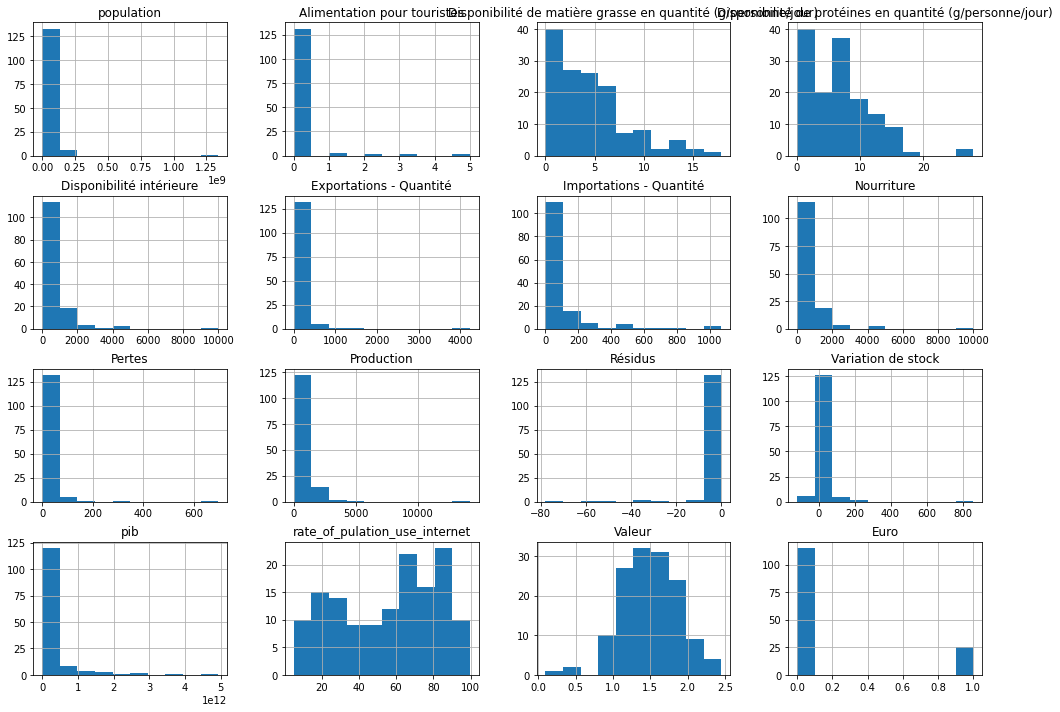

In [77]:
# Affichage de plusieurs histogrammes pour l'analyse exploratoire
df5.hist(figsize=(17, 12))

plt.show()